In [37]:
# make graphs
# make folders for data with compressor alg and without
# run another piece of code (folder_name) instead of changing the code for MongoDB 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def candle_plot(files, title):

    fig, ax = plt.subplots()

    for i, file in enumerate(files):
        data = pd.read_csv(file, header=None)

        open_val = data.iloc[0][0]
        high_val = data.max()[0]
        low_val = data.min()[0]
        close_val = data.iloc[-1][0]
        avg_val = data.mean()[0]

        # make somewhat candle plot
        ax.plot([i+1]*2, [low_val, high_val], color='black', label='Range' if i == 0 else "")  # The range
        ax.plot([i+1], [avg_val], marker='o', markersize=5, color='red', label='Average' if i == 0 else "")  # The average value

    ax.set_xticks(range(1, len(files) + 1))
    ax.set_xticklabels(['Mongo snappy', 'Mongo zlib', 'Mongo zstd', 'Arango'])

    plt.title(title)
    plt.ylabel("run time [s]")
    plt.grid(True)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    plt.show()




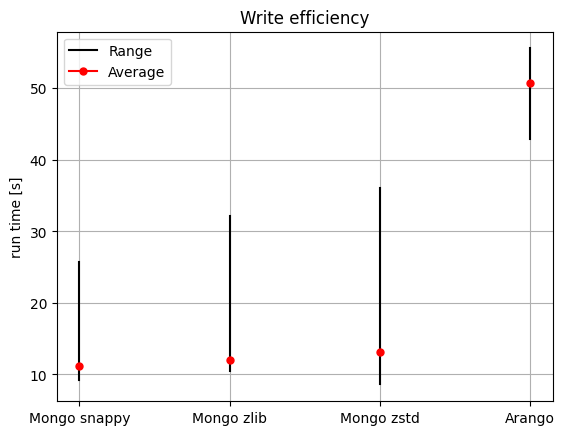

In [38]:
files = ['Mongo/data_snappy/insert.csv', 'Mongo/data_zlib/insert.csv', 'Mongo/data_zstd/insert.csv', 'Arango/data/insert.csv']

candle_plot(files, "Write efficiency")

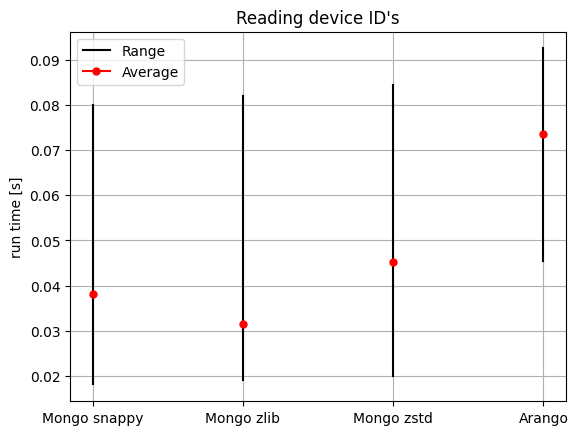

In [39]:
spc = "readDeviceID"
files = [f'Mongo/data_snappy/{spc}.csv',f'Mongo/data_zlib/{spc}.csv', f'Mongo/data_zstd/{spc}.csv', f'Arango/data/{spc}.csv']
candle_plot(files, "Reading device ID's")

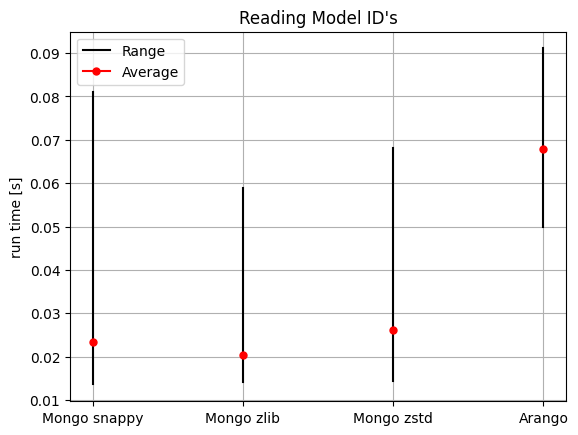

In [40]:
spc = "readModelID"
files = [f'Mongo/data_snappy/{spc}.csv', f'Mongo/data_zlib/{spc}.csv', f'Mongo/data_zstd/{spc}.csv', f'Arango/data/{spc}.csv']
candle_plot(files, "Reading Model ID's")

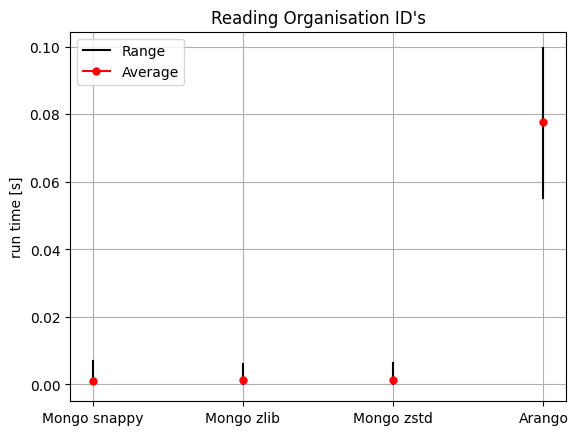

In [41]:
spc = "readOrgID"
files = [f'Mongo/data_snappy/{spc}.csv', f'Mongo/data_zlib/{spc}.csv', f'Mongo/data_zstd/{spc}.csv', f'Arango/data/{spc}.csv']
candle_plot(files, "Reading Organisation ID's")

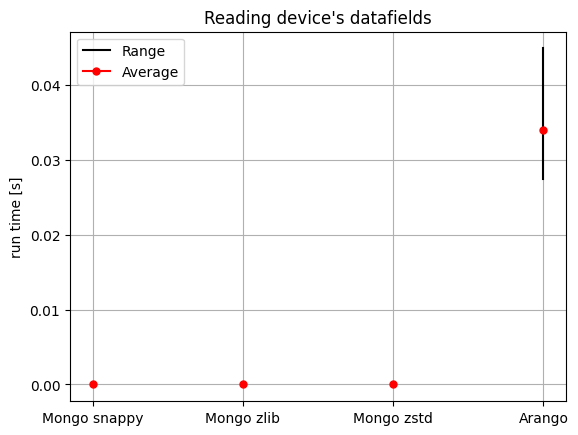

In [42]:
spc = "readDevicesFieldsAVG"
files = [f'Mongo/data_snappy/{spc}.csv', f'Mongo/data_zlib/{spc}.csv', f'Mongo/data_zstd/{spc}.csv', f'Arango/data/{spc}.csv']
candle_plot(files, "Reading device's datafields")

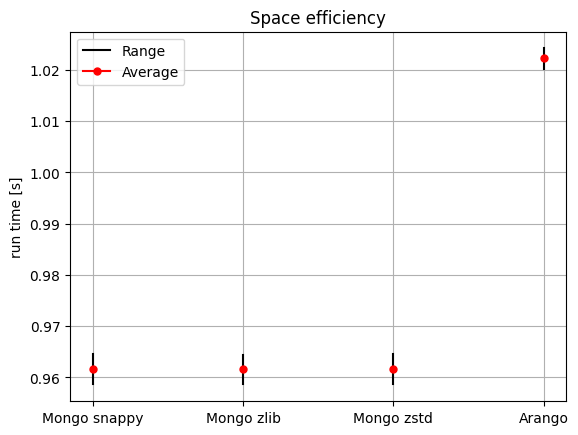

In [43]:
spc = "space"
files = [f'Mongo/data_snappy/{spc}.csv', f'Mongo/data_zlib/{spc}.csv', f'Mongo/data_zstd/{spc}.csv', f'Arango/data/{spc}.csv']
candle_plot(files, "Space efficiency")

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def avg_candle_plot(files_sets, title):

    fig, ax = plt.subplots()

    for i, files in enumerate(files_sets):
        data_sets = [pd.read_csv(file, header=None) for file in files]
        data = pd.concat(data_sets, axis=1).mean(axis=1)

        # Calculate the open, high, low, and close values
        open_val = data.iloc[0]
        high_val = data.max()
        low_val = data.min()
        close_val = data.iloc[-1]

        # Calculate the average value
        avg_val = data.mean()

        # Plot the candlestick
        ax.plot([i+1]*2, [low_val, high_val], color='black', label='Range' if i == 0 else "")  # The range
        ax.plot([i+1], [avg_val], marker='o', markersize=5, color='red', label='Average' if i == 0 else "")  # The average value

    # Set the x-ticks to be the names of the experiments
    ax.set_xticks(range(1, len(files_sets) + 1))
    ax.set_xticklabels(['Mongo snappy', 'Mongo zlib', 'Mongo zstd', 'Arango'])

    plt.title(title)
    plt.ylabel("run time [s]")
    plt.grid(True)

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    plt.show()


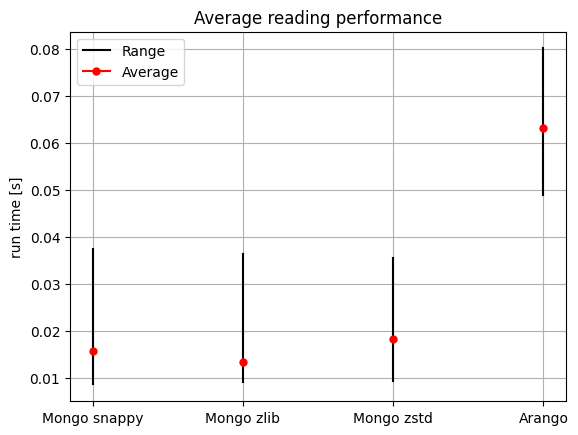

In [45]:


files = [["Mongo/data_snappy/readDeviceID.csv", "Mongo/data_snappy/readDevicesFieldsAVG.csv", "Mongo/data_snappy/readModelID.csv", "Mongo/data_snappy/readOrgID.csv"],
    
        ["Mongo/data_zlib/readDeviceID.csv", "Mongo/data_zlib/readDevicesFieldsAVG.csv", "Mongo/data_zlib/readModelID.csv", "Mongo/data_zlib/readOrgID.csv"],
         
         ["Mongo/data_zstd/readDeviceID.csv", "Mongo/data_zstd/readDevicesFieldsAVG.csv", "Mongo/data_zstd/readModelID.csv", "Mongo/data_zstd/readOrgID.csv"],
         
         ["Arango/data/readDeviceID.csv", "Arango/data/readDevicesFieldsAVG.csv", "Arango/data/readModelID.csv", "Arango/data/readOrgID.csv"]]


avg_candle_plot(files, "Average reading performance")

In [46]:
import pandas as pd
from scipy import stats

def paired_t_test(file1, file2, alpha):
    data1 = pd.read_csv(file1, header=None)
    data2 = pd.read_csv(file2, header=None)

    t_stat, p_val = stats.ttest_rel(data1[0], data2[0])

    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_val}")

    if p_val < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")


spc = "space"
files = [f'Mongo/data_zlib/{spc}.csv', f'Mongo/data_zstd/{spc}.csv']

paired_t_test(files[0], files[1], 0.05)

t-statistic: 0.4895082094201853
p-value: 0.62482372923458
The difference is not statistically significant.
